# 모듈 불러오기

In [1]:
# import library

import os
import sys

import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as sk_cart
from sklearn.model_selection import train_test_split


# 데이터 불러오기 및 전처리

In [2]:
# Get the Data 
raw_df = pd.read_csv('https://raw.githubusercontent.com/countifs/rawdata/main/UCI%20-%20Breast%20Cancer%20Wisconsin%20(Original)/breastCancer.csv')

In [3]:
def preprocess(raw_df):
    df = raw_df.copy()
    df = df[df['bare_nucleoli'] != '?'] # 16개의 '?' 행 제거
    df['bare_nucleoli'] = df['bare_nucleoli'].astype(int) # 문자열을 정수형으로 변환
    df.drop_duplicates(inplace=True) # 중복된 행 제거
    df.replace({'class': {2: 0, 4: 1}}, inplace=True)  # 2: Benign, 4: Malignant
    df.reset_index(drop=True, inplace=True) # index 재설정
    df.drop(columns=['id'], axis=1, inplace=True) # id 열 제거
    return df

df = preprocess(raw_df).copy()

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='class')
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

# cart1 트리 (gini)

In [5]:
# DT termination criteria
MAX_DEPTH = 10
sample_ratio = 0.01
n_samples = int(sample_ratio * len(X_train))

In [6]:
sk_dt1 = sk_cart(min_samples_leaf = n_samples, max_depth = MAX_DEPTH, \
    criterion ='gini', splitter='best')
cart1 = sk_dt1.fit(X=X_train, y= y_train)

In [7]:
# decision tree graph export 
dot_data = tree.export_graphviz(cart1, out_file=None, 
                                feature_names=X_train.columns,
                                class_names=['0', '1'],
                                filled=True, rounded=False)

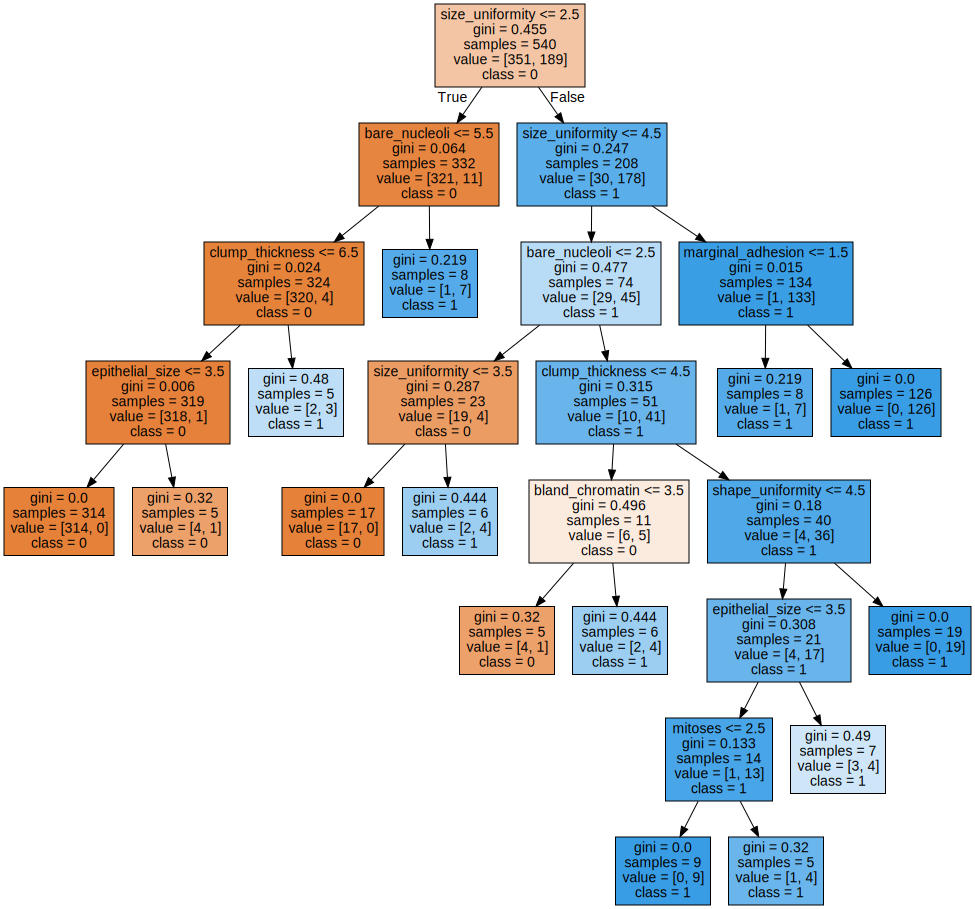

In [8]:
# 그래프 출력
graph = graphviz.Source(dot_data)
graph

▶ acc: 0.9703703703703703
▶ f1 score: 0.9574468085106385
▶ confusion matrix:
[[86  2]
 [ 2 45]]
▶ AUC: 0.9673597678916829
▶ classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        88
           1       0.96      0.96      0.96        47

    accuracy                           0.97       135
   macro avg       0.97      0.97      0.97       135
weighted avg       0.97      0.97      0.97       135



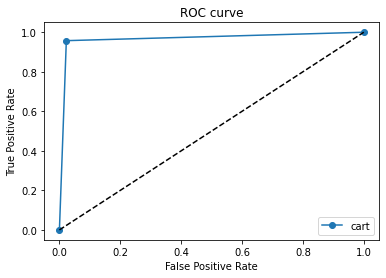

In [9]:
# 테스트 데이터로 예측
y_pred = cart1.predict(X_test)

# 정확도
from sklearn.metrics import accuracy_score
print('▶ acc:' , accuracy_score(y_test, y_pred) )

# f1-score
from sklearn.metrics import f1_score
print('▶ f1 score:' , f1_score(y_test, y_pred) )
         
# confusion matrix
from sklearn.metrics import confusion_matrix
print('▶ confusion matrix:' , confusion_matrix(y_test, y_pred), sep='\n' )

# AUC
from sklearn.metrics import roc_auc_score
print('▶ AUC:', roc_auc_score(y_test, y_pred))

# classification report
from sklearn.metrics import classification_report
print('▶ classification report:' , classification_report(y_test, y_pred), sep='\n' )
# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, 'o-', label='cart')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


# cart2 트리 (entropy)

In [10]:
# DT termination criteria
MAX_DEPTH = 5
sample_ratio = 0.05
n_samples = int(sample_ratio * len(X_train))

In [11]:
# cart entropy
sk_dt2 = sk_cart(min_samples_leaf = n_samples, max_depth = MAX_DEPTH, \
    criterion ='entropy', splitter='best')
cart2 = sk_dt2.fit(X=X_train, y= y_train)

In [12]:
# decision tree graph export 
dot_data = tree.export_graphviz(cart2, out_file=None, 
                                feature_names=X_train.columns,
                                class_names=['0', '1'],
                                filled=True, rounded=False)

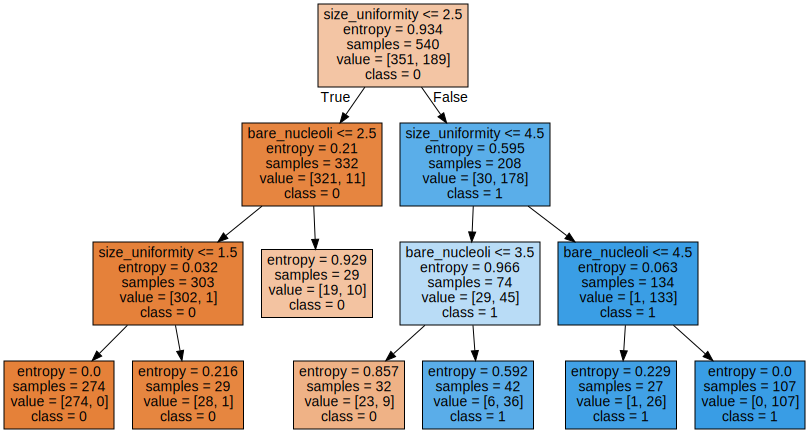

In [13]:
# 그래프 출력
graph = graphviz.Source(dot_data)
graph

▶ acc: 0.9703703703703703
▶ f1 score: 0.9574468085106385
▶ confusion matrix:
[[86  2]
 [ 2 45]]
▶ AUC: 0.9673597678916829
▶ classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        88
           1       0.96      0.96      0.96        47

    accuracy                           0.97       135
   macro avg       0.97      0.97      0.97       135
weighted avg       0.97      0.97      0.97       135



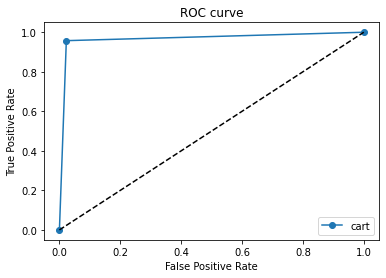

In [14]:
# 테스트 데이터로 예측
y_pred = cart1.predict(X_test)

# 정확도
from sklearn.metrics import accuracy_score
print('▶ acc:' , accuracy_score(y_test, y_pred) )

# f1-score
from sklearn.metrics import f1_score
print('▶ f1 score:' , f1_score(y_test, y_pred) )
         
# confusion matrix
from sklearn.metrics import confusion_matrix
print('▶ confusion matrix:' , confusion_matrix(y_test, y_pred), sep='\n' )

# AUC
from sklearn.metrics import roc_auc_score
print('▶ AUC:', roc_auc_score(y_test, y_pred))

# classification report
from sklearn.metrics import classification_report
print('▶ classification report:' , classification_report(y_test, y_pred), sep='\n' )
# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, 'o-', label='cart')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


# Rule 추출 함수

In [15]:
from sklearn.tree import _tree

def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"{name} <= {np.round(threshold, 3)}"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"{name} > {np.round(threshold, 3)}"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [16]:
# cart1 rule 출력
rules1 = get_rules(cart1, X_train.columns, ['0', '1'])
rules1

['if size_uniformity <= 2.5 and bare_nucleoli <= 5.5 and clump_thickness <= 6.5 and epithelial_size <= 3.5 then class: 0 (proba: 100.0%) | based on 314 samples',
 'if size_uniformity > 2.5 and size_uniformity > 4.5 and marginal_adhesion > 1.5 then class: 1 (proba: 100.0%) | based on 126 samples',
 'if size_uniformity > 2.5 and size_uniformity <= 4.5 and bare_nucleoli > 2.5 and clump_thickness > 4.5 and shape_uniformity > 4.5 then class: 1 (proba: 100.0%) | based on 19 samples',
 'if size_uniformity > 2.5 and size_uniformity <= 4.5 and bare_nucleoli <= 2.5 and size_uniformity <= 3.5 then class: 0 (proba: 100.0%) | based on 17 samples',
 'if size_uniformity > 2.5 and size_uniformity <= 4.5 and bare_nucleoli > 2.5 and clump_thickness > 4.5 and shape_uniformity <= 4.5 and epithelial_size <= 3.5 and mitoses <= 2.5 then class: 1 (proba: 100.0%) | based on 9 samples',
 'if size_uniformity > 2.5 and size_uniformity > 4.5 and marginal_adhesion <= 1.5 then class: 1 (proba: 87.5%) | based on 8 sa

In [17]:
# cart2 rule 출력
rules2 = get_rules(cart2, X_train.columns, ['0', '1'])
rules2

['if size_uniformity <= 2.5 and bare_nucleoli <= 2.5 and size_uniformity <= 1.5 then class: 0 (proba: 100.0%) | based on 274 samples',
 'if size_uniformity > 2.5 and size_uniformity > 4.5 and bare_nucleoli > 4.5 then class: 1 (proba: 100.0%) | based on 107 samples',
 'if size_uniformity > 2.5 and size_uniformity <= 4.5 and bare_nucleoli > 3.5 then class: 1 (proba: 85.71%) | based on 42 samples',
 'if size_uniformity > 2.5 and size_uniformity <= 4.5 and bare_nucleoli <= 3.5 then class: 0 (proba: 71.88%) | based on 32 samples',
 'if size_uniformity <= 2.5 and bare_nucleoli > 2.5 then class: 0 (proba: 65.52%) | based on 29 samples',
 'if size_uniformity <= 2.5 and bare_nucleoli <= 2.5 and size_uniformity > 1.5 then class: 0 (proba: 96.55%) | based on 29 samples',
 'if size_uniformity > 2.5 and size_uniformity > 4.5 and bare_nucleoli <= 4.5 then class: 1 (proba: 96.3%) | based on 27 samples']

# Rule Qualtiy 분석

In [18]:
def rule_quailty(rules):

    rule_list = []
    rule_class = []
    cover_count = []
    coverage = []
    homogeneity = []
    class_0 = []
    class_1 = []
    
    data = pd.concat([X_train, y_train], axis=1)

    for i in range(len(rules)):
        rule_list.append(rules[i].split('if ')[1].split(' then ')[0])
        rule_class.append(rules[i].split('class: ')[1].split(' (proba: ')[0])
        cover_count.append(len(X_train.query(rule_list[i])) )
        coverage.append(round(len(data.query(rule_list[i])) / len(data), 3 ) )
        class_0.append( sum (data.query(rule_list[i])['class'] == 0) )
        class_1.append( sum (data.query(rule_list[i])['class'] == 1) )
        homogeneity.append(round( max(class_0[i], class_1[i]) / cover_count[i], 3 ) )  
        
    rule_df = pd.DataFrame({'rule':rule_list, 'class':rule_class, 'cover_count':cover_count, 'coverage':coverage, 'homogeneity': homogeneity,
                        'class_0':class_0, 'class_1':class_1})    
    
    # condition컬럼에서 and 개수 찾기
    rule_df['cond_count'] = rule_df['rule'].str.count(' and ') + 1 
    
    #condition에서 부호가 모두 같으면 1, 다르면 0
    rule_df['cond_sign'] = rule_df['rule'].str.contains('<=') & rule_df['rule'].str.contains('>')
    rule_df['cond_sign'] = rule_df['cond_sign'].astype(int)
    
    pd.set_option('display.max_colwidth', None)
    return rule_df

In [19]:
# cart1 rule quality 분석
rule_quailty(rules1)

,rule,class,cover_count,coverage,homogeneity,class_0,class_1,cond_count,cond_sign
0,size_uniformity <= 2.5 and bare_nucleoli <= 5.5 and clump_thickness <= 6.5 and epithelial_size <= 3.5,0,314,0.581,1.000,314,0,4,0
1,size_uniformity > 2.5 and size_uniformity > 4.5 and marginal_adhesion > 1.5,1,126,0.233,1.000,0,126,3,0
2,size_uniformity > 2.5 and size_uniformity <= 4.5 and bare_nucleoli > 2.5 and clump_thickness > 4.5 and shape_uniformity > 4.5,1,19,0.035,1.000,0,19,5,1
3,size_uniformity > 2.5 and size_uniformity <= 4.5 and bare_nucleoli <= 2.5 and size_uniformity <= 3.5,0,17,0.031,1.000,17,0,4,1
4,size_uniformity > 2.5 and size_uniformity <= 4.5 and bare_nucleoli > 2.5 and clump_thickness > 4.5 and shape_uniformity <= 4.5 and epithelial_size <= 3.5 and mitoses <= 2.5,1,9,0.017,1.000,0,9,7,1
5,size_uniformity > 2.5 and size_uniformity > 4.5 and marginal_adhesion <= 1.5,1,8,0.015,0.875,1,7,3,1
6,size_uniformity <= 2.5 and bare_nucleoli > 5.5,1,8,0.015,0.875,1,7,2,1
7,size_uniformity > 2.5 and size_uniformity <= 4.5 and bare_nucleoli > 2.5 and clump_thickness > 4.5 and shape_uniformity <= 4.5 and epithelial_size > 3.5,1,7,0.013,0.571,3,4,6,1
8,size_uniformity > 2.5 and size_uniformity <= 4.5 and bare_nucleoli > 2.5 and clump_thickness <= 4.5 and bland_chromatin > 3.5,1,6,0.011,0.667,2,4,5,1
9,size_uniformity > 2.5 and size_uniformity <= 4.5 and bare_nucleoli <= 2.5 and size_uniformity > 3.5,1,6,0.011,0.667,2,4,4,1


In [20]:
# cart2 rule quality 분석
rule_quailty(rules2)

,rule,class,cover_count,coverage,homogeneity,class_0,class_1,cond_count,cond_sign
0,size_uniformity <= 2.5 and bare_nucleoli <= 2.5 and size_uniformity <= 1.5,0,274,0.507,1.000,274,0,3,0
1,size_uniformity > 2.5 and size_uniformity > 4.5 and bare_nucleoli > 4.5,1,107,0.198,1.000,0,107,3,0
2,size_uniformity > 2.5 and size_uniformity <= 4.5 and bare_nucleoli > 3.5,1,42,0.078,0.857,6,36,3,1
3,size_uniformity > 2.5 and size_uniformity <= 4.5 and bare_nucleoli <= 3.5,0,32,0.059,0.719,23,9,3,1
4,size_uniformity <= 2.5 and bare_nucleoli > 2.5,0,29,0.054,0.655,19,10,2,1
5,size_uniformity <= 2.5 and bare_nucleoli <= 2.5 and size_uniformity > 1.5,0,29,0.054,0.966,28,1,3,1
6,size_uniformity > 2.5 and size_uniformity > 4.5 and bare_nucleoli <= 4.5,1,27,0.050,0.963,1,26,3,1
